In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits.mplot3d

df=pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Задача 1

#### 1.2. Изучите стоимости недвижимости

Text(0, 0.5, 'Количество')

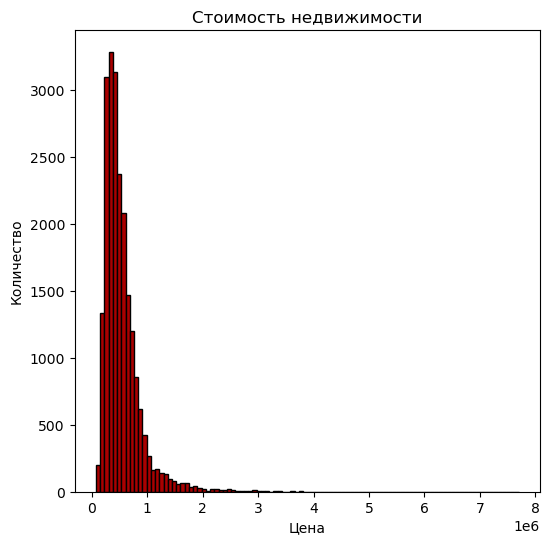

In [18]:
plt.figure(figsize=(6, 6))
plt.hist(df['price'], bins = 100, edgecolor='black', color = '#AA0000')
plt.title('Стоимость недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество')

Вывод: основная часть недвижимости продается по цене до 1 000 000 д.е.

#### 1.3. Изучите распределение квадратуры жилой недвижимости

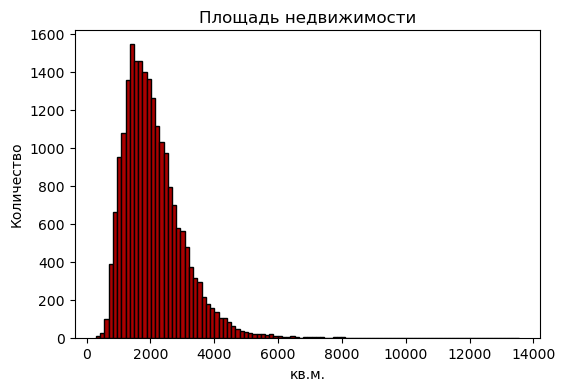

In [24]:
plt.figure(figsize=(6, 4))
plt.hist(df['sqft_living'], bins = 100, edgecolor='black', color = '#AA0000')
plt.title('Площадь недвижимости')
plt.xlabel('кв.м.')
plt.ylabel('Количество');

Вывод: основная часть недвижимости имеет площадь в интервале от 1000 до 2500 кв.м.

#### 1.4. Изучите распределение года постройки

In [30]:
data_yr = df['yr_built'].value_counts(ascending=True)
data_yr.head()
years_list = [1900+i*10 for i in range (0,13)]

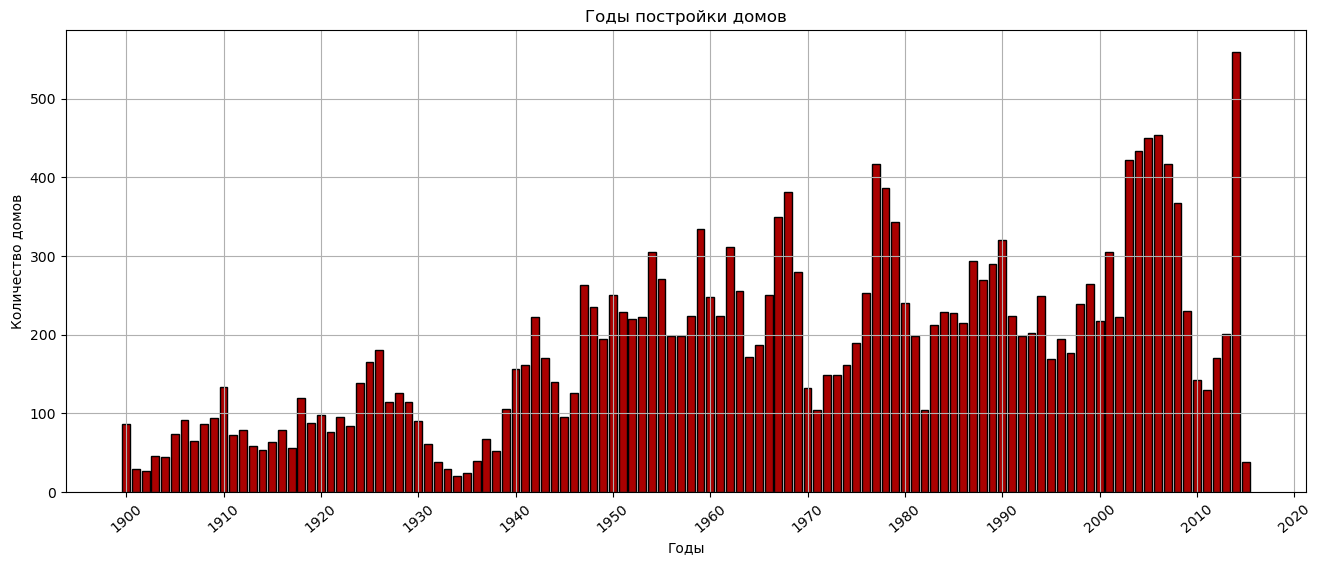

In [33]:
names = data_yr.index
values = data_yr.values
yr_list = list(range(1900,2030,10))
plt.figure(figsize=(16, 6))
plt.bar(names,values, edgecolor='black', color = '#AA0000')
plt.title('Годы постройки домов')
plt.xlabel('Годы')
plt.ylabel('Количество домов')
plt.grid(True)
plt.xticks(yr_list,rotation=40);
plt.show()

Вывод: активный рост строительства начался в 50-х годах. Рост и падение количества ввведенных в эксплуатацию домов, вероятнее всего, зависит от ситуации в экономике. Последний существенный рост наблюдается в середине 2000-х годов. В начале 2010-х был очередной обвал на рынке жилья. 

### Задача 2

#### 2.1. Изучите распределение домов от наличия вида на набережную

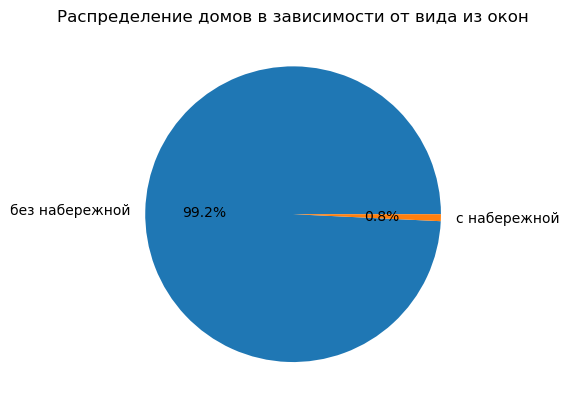

In [35]:
data = df["waterfront"].apply(lambda x: "без набережной" if x==0 else "c набережной")
data = data.value_counts()
data

names = data.index
values = data.values
plt.title('Распределение домов в зависимости от вида из окон')
plt.pie(values, autopct='%.1f%%', labels=names);

Вывод: всего лишь 0,8% недвижимости имеет вид на набережную.

#### 2.2. Изучите распределение этажей домов

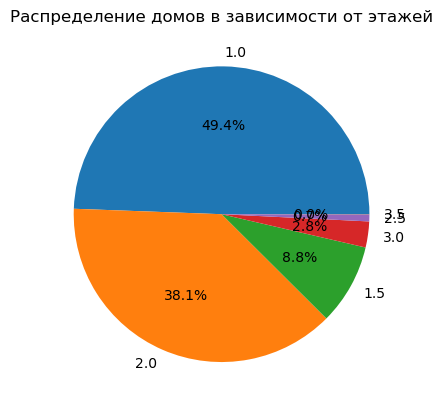

In [37]:
data = df['floors']
data = data.value_counts()
data
names = data.index
values = data.values
plt.title('Распределение домов в зависимости от этажей')
plt.pie(values, autopct='%.1f%%', labels=names);

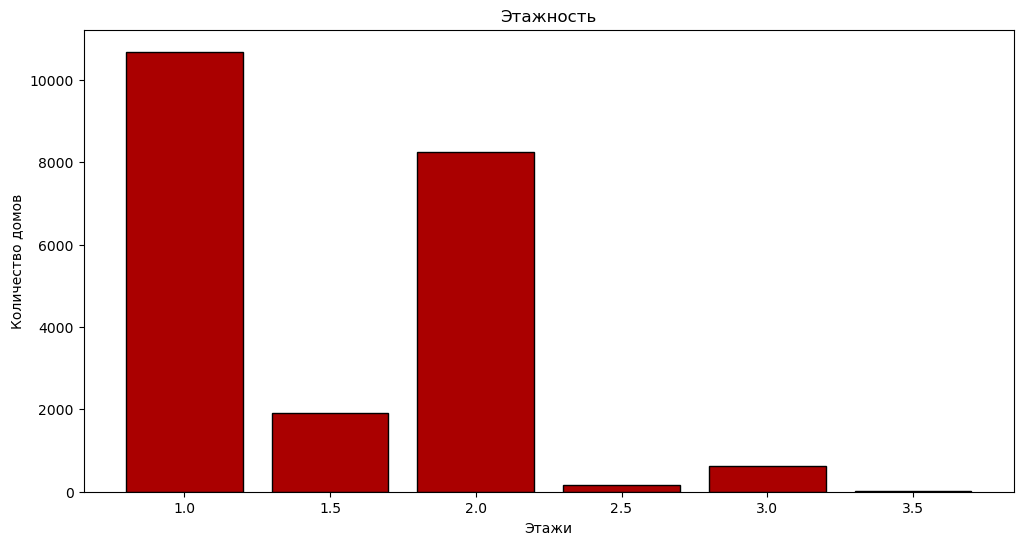

In [42]:
data_floor = df['floors'].value_counts()
f_val = data_floor.values
f_ind = data_floor.index
plt.figure(figsize=(12, 6))
plt.bar(f_ind,f_val, width=0.4, edgecolor='black', color = '#AA0000')
plt.title('Этажность')
plt.xlabel('Этажи')
plt.ylabel('Количество домов')
plt.show()

Вывод: большая часть недвижимости (около 88%) имеет 1 или 2 этажа

#### 2.3. Изучите распределение состояния домов

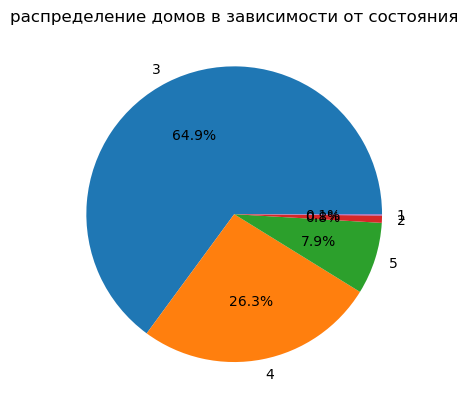

In [43]:
data=df["condition"].value_counts()
names = data.index
values = data.values
plt.title('Распределение домов в зависимости от состояния')
plt.pie(values, autopct='%.1f%%', labels=names);

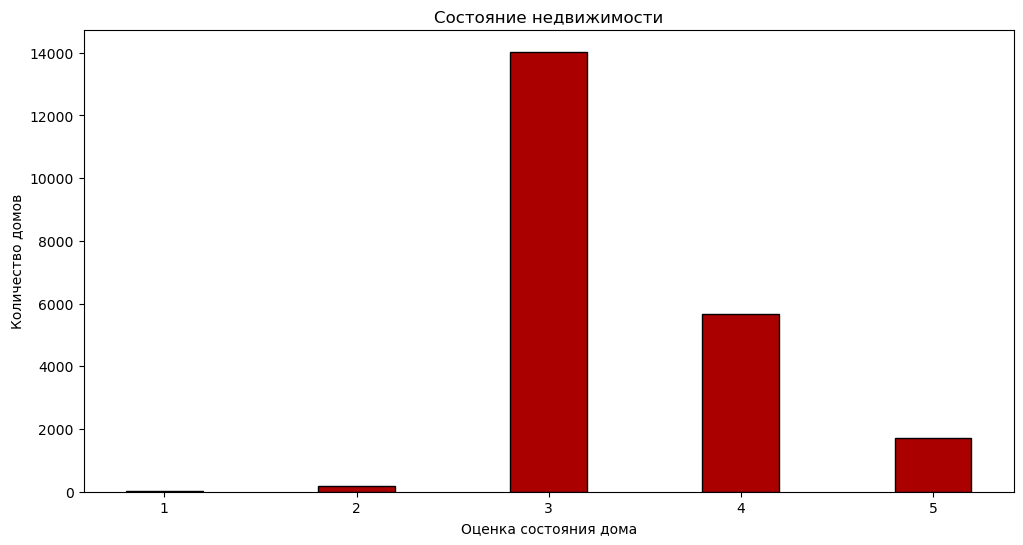

In [45]:
data_cond = df['condition'].value_counts()
cond_val = data_cond.values
cond_ind = data_cond.index
plt.figure(figsize=(12, 6))
plt.bar(cond_ind,cond_val, width=0.4, edgecolor='black', color = '#AA0000')
plt.title('Состояние недвижимости')
plt.xlabel('Оценка состояния дома')
plt.ylabel('Количество домов')
plt.show()

Вывод: около 65% домов имеет удовлетворительную оценку. Чуть больше четверти домов хорошую и отличную оценку.

### Задача 3

#### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [46]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


Для более удобного визуального поиска воспользуемся тепловой картой для нашей корреляционной таблицы

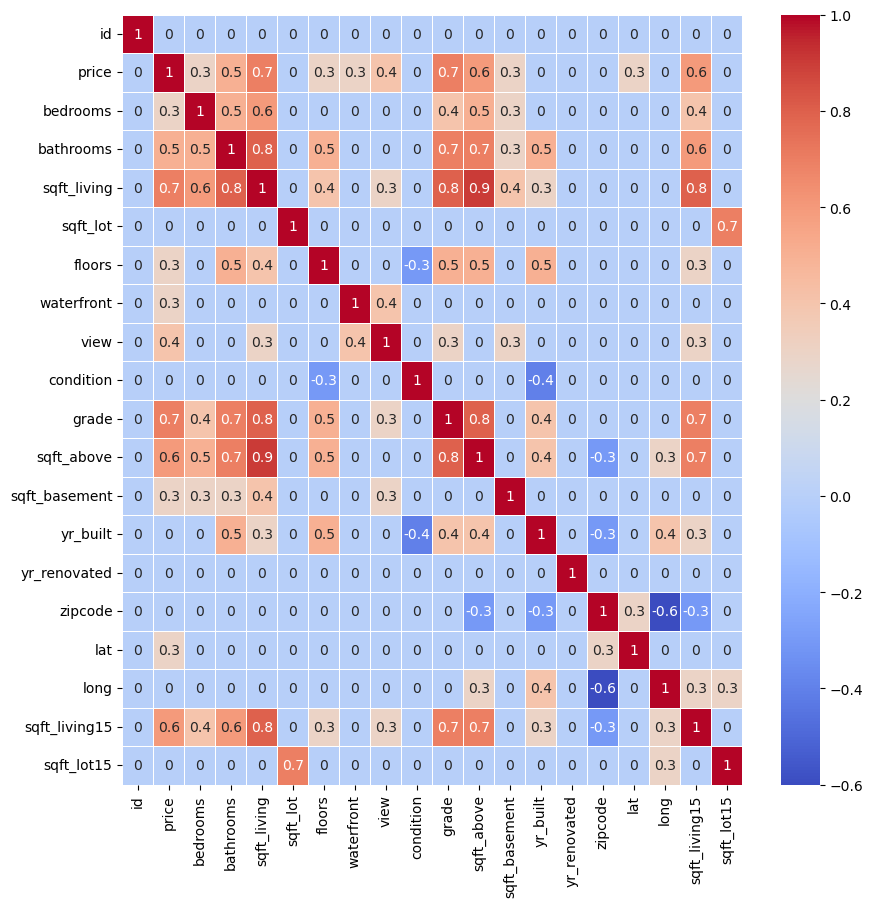

In [47]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

Изучив тепловую карту таблицы, можно сделать вывод, что цена в большинстве случаев имеет прямую линейную зависимость. Выделим основные ярко выраженные зависимости: жилая площадь, общая оценка дома, площадь без подвала, количество ванных комнат, оценка вида, площадь подвала,количество спален, наличие набережной.

Так как площадь явный фактор, который влияет на конечную стоимость, то его можно убрать из списка, а также его производные(площадь без подвала и площадь подвала).

Ниже рассмотрим такие факторы как: оценка дома,количество ванных, оценка вида, количество спален и наличие набережной.

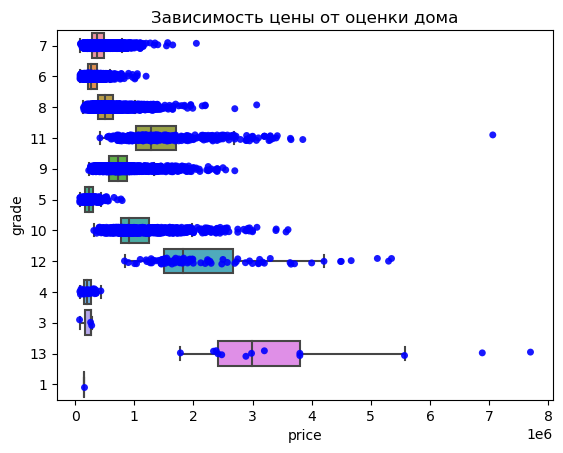

In [48]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5, showfliers=False)
sns.stripplot(x=df['price'],  y=df['grade'].astype('str'), marker="o", alpha=0.9, color="b")
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Зависимость цены от оценки дома');

Вывод:стоимость дома с увеличением его оценки возрастает, а количество домов с высокой оценкой падает и разброс цены домов с высокой оценкой увеличивается